In [13]:
# Ames housing dataset
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [22]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [257]:
url = 'http://jse.amstat.org/v19n3/decock/AmesHousing.txt'
df = pd.read_csv(url, header=0, sep = ' ', delimiter='\t')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [258]:
# target_name = "SalePrice"
# data, target = df.drop(columns=target_name), data[target_name]

In [259]:
# not na observations on the df columns
all_data_na = df.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_na.head(10)

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Fireplace Qu     1422
Lot Frontage      490
Garage Yr Blt     159
Garage Cond       159
Garage Qual       159
Garage Finish     159
dtype: int64

Text(0.5, 1.0, 'Percent missing data by feature')

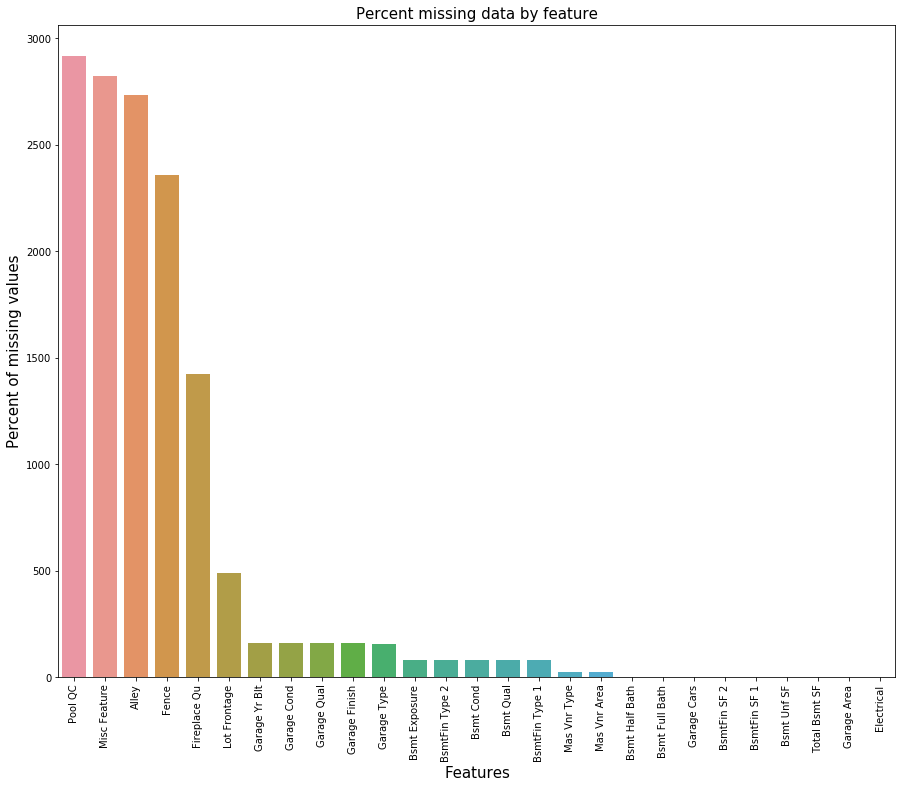

In [260]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [261]:
# drop columns with less than 600 observations
df =  df.drop(all_data_na[:5].index, axis=1)

In [262]:
df_lots = df[['Lot Frontage', 'Lot Area', 'Lot Config', 'Lot Shape']]
grouped_lots = df_lots.groupby(['Lot Shape']).mean()
grouped_lots

,Lot Frontage,Lot Area
Lot Shape,,
IR1,74.814985,11544.208376
IR2,67.437500,18913.065789
IR3,117.636364,32064.187500
Reg,66.848871,8865.632598


In [263]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["Lot Frontage"] = df.groupby("Lot Shape")["Lot Frontage"].transform(
    lambda x: x.fillna(x.median()))

In [267]:
# np.nan means 0 garage
for col in ('Garage Yr Blt', 'Garage Area', 'Garage Cars'):
    df[col] = df[col].fillna(0)

In [268]:
# np.nan mean 0 bsmt
for col in ('BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'):
    df[col] = df[col].fillna(0)

In [269]:
# coluna inteira igual não ajuda regressão
df = df.drop(['Utilities'], axis=1)

In [275]:
# not na observations on the df columns
all_data_na = df.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_na

Garage Cond       159
Garage Qual       159
Garage Finish     159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
BsmtFin Type 1     80
Bsmt Cond          80
Bsmt Qual          80
Mas Vnr Area       23
Mas Vnr Type       23
Electrical          1
dtype: int64

In [276]:
# TODO: terminar de mexer nesses np.nan

In [277]:
df_ = df # salvando df manipulado para continuar limpeza dps
df = df.dropna()

In [279]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area

In [280]:
#MSSubClass=The building class
df['MS SubClass'] = df['MS SubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['Overall Cond'] = df['Overall Cond'].astype(str)


#Year and month sold are transformed into categorical features.
df_['Yr Sold'] = df['Yr Sold'].astype(str)
df_['Mo Sold'] = df['Mo Sold'].astype(str)

/home/aime/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/aime/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# TODO: procurar outliers

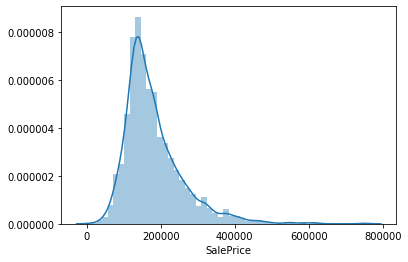

In [62]:
import seaborn as sns
sns.distplot(target) # long right tail suggests outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

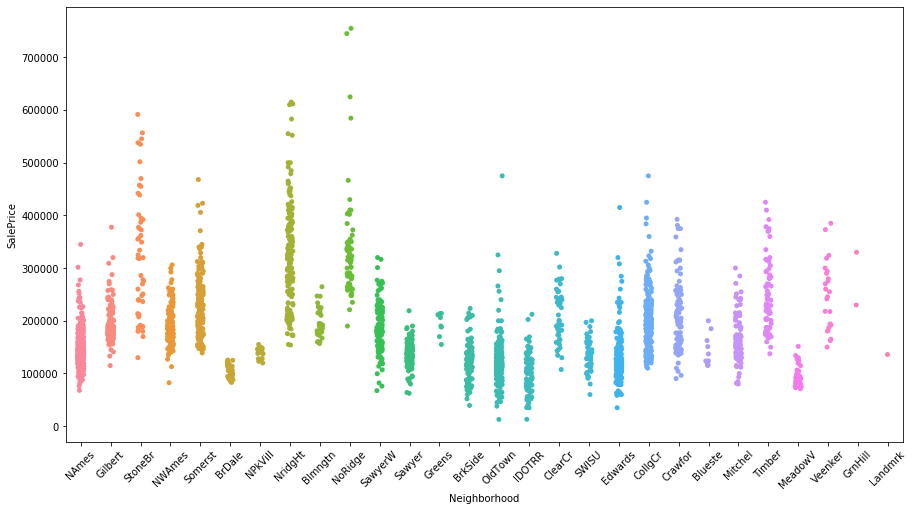

In [287]:
plt.figure(figsize=(15,8))
ax = sns.stripplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation=45)


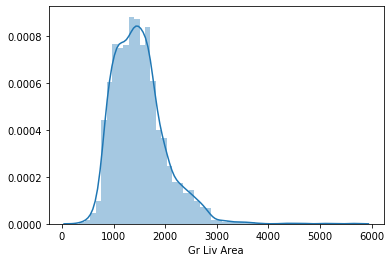

In [234]:
sns.distplot(df['Gr Liv Area'])

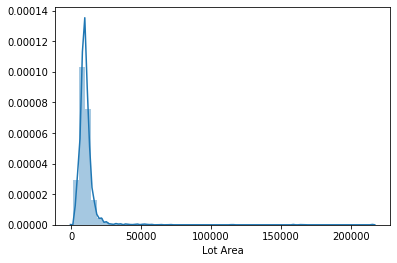

In [235]:
sns.distplot(df['Lot Area'])

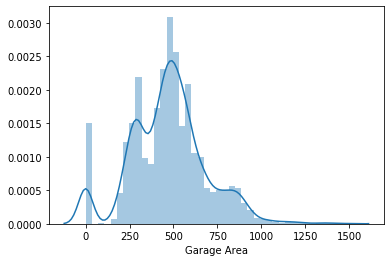

In [236]:
sns.distplot(df['Garage Area'])

In [77]:
# numerical_data = data.select_dtypes("number")
# string_data = data.select_dtypes(object)

In [ ]:
# cansei

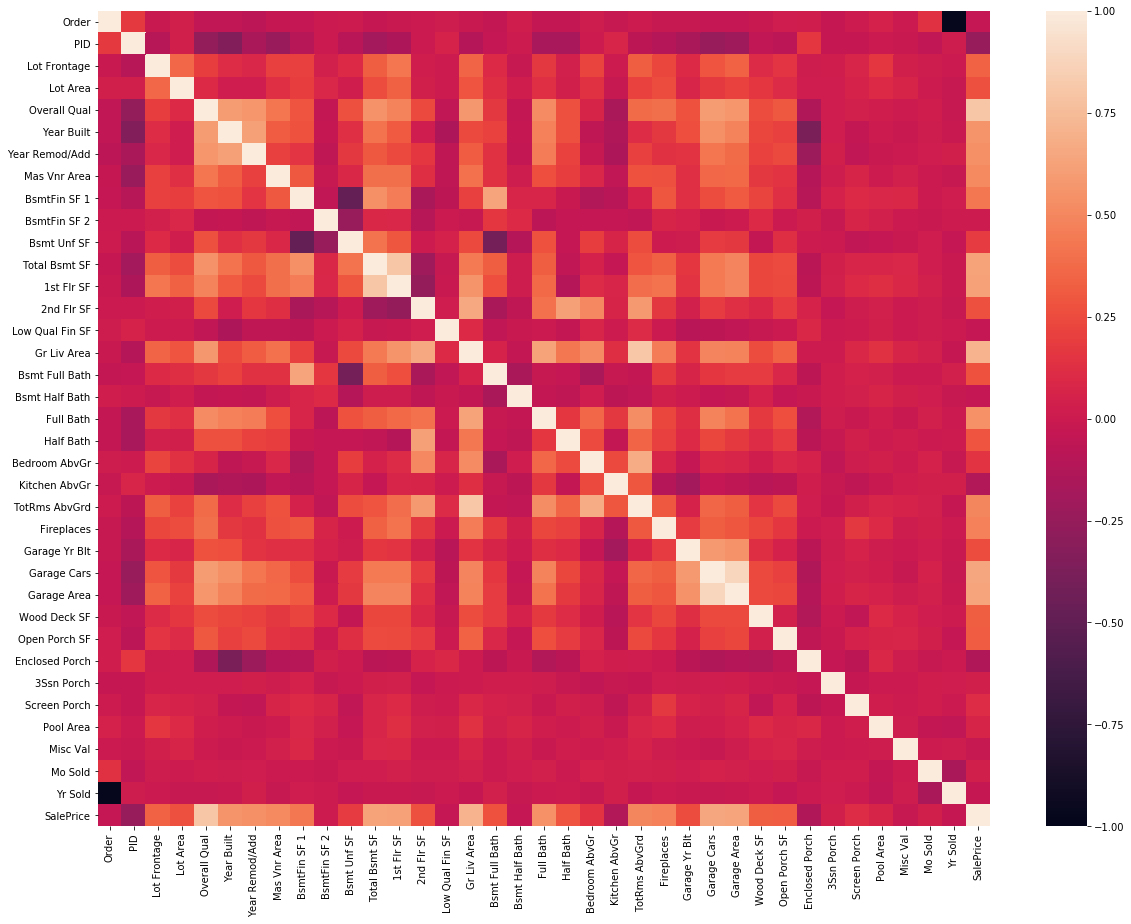

In [295]:
corrmat = df.corr()
plt.figure(figsize=(20,15))
# ax = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
ax = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=False)

plt.show()

In [ ]:
# Box Cox Transformation of (highly) skewed features

In [311]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

train, test = train_test_split(df, test_size=0.3)
y_train = train.SalePrice.values
n_folds = 5

def rmsle_cv(model): # Root-Mean-Square Error of Cross-Validation.
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [307]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso

# LASSO Regression :
# This model may be very sensitive to outliers. So we need to made it more robust on them. 
# For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [314]:
# score = rmsle_cv(lasso)
# # print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [306]:
from sklearn.kernel_ridge import KernelRidge

# Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)